### **Problem Definition**


#### <u>Latar Belakang</u>
Berdasarkan laporan dari perusahaan agensi media sosial yang berpusat di Inggris, We Are Social, jumlah pengguna Twitter di Indonesia pada 2022 mencapai 18,45 juta dari total 436 Juta pengguna dari seluruh dunia. Sebuah pesan pada Twitter atau lebih dikenal sebagai ‘tweet’ memiliki berbagai macam variasi, salah satunya adalah dalam bentuk teks. Tweet  berupa teks yang dikirim oleh masyarakat Indonesia tidak jarang mengandung unsur ujaran kebencian dan abusif.


#### <u>Tujuan</u> 
Tweet dengan ujaran kebencian dan abusif dapat terbilang cukup berbahaya karena dapat menimbulkan konflik antara sesama pengguna Twitter. Dengan mengenali lebih dalam tentang karakteristik tweet yang mengandung unsur ujaran kebencian dan abusif, maka tindakan selanjutnya dapat diterapkan untuk mencegah dampak buruk yang dapat meluas.

#### <u>Rumusan Masalah</u> 
Penelitian ini dilakukan untuk mengetahui secara mendetail tentang tweet dengan unsur ujaran kebencian dan abusif. Analisis secara mendalam dilakukan untuk mengetahui kisaran kata dan huruf pada tweet. Kata yang sering muncul dalam tweet dengan ujaran kebencian dan abusif juga dapat ditemukan untuk mengetahui karakteristik secara lebih mendalam.

#### <u>Sumber Data</u> 
Muhammad Okky Ibrohim and Indra Budi. 2019. Multi-label Hate Speech and Abusive Language Detection in Indonesian Twitter. In ALW3: 3rd Workshop on Abusive Language Online, 46-57.

### **Data Preparation**

#### <u>Import Library</u>

In [3]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#### <u>Load Data</u>

In [4]:
df = pd.read_csv('csv\data.csv', encoding='latin-1')

#### <u>Cek 5 data teratas dan terbawah</u>

In [5]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [6]:
df.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0


#### <u>Cek Jumlah Kolom dan Baris</u>

In [7]:
df.shape

(13169, 13)

#### <u>Cek Total Duplikat Data</u>

In [8]:
df.duplicated().sum()

125

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

#### <u>Cek Missing Values</u>

In [11]:
df.isna().sum()/df.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

#### <u>Data Cleansing</u>

In [12]:
# Load the slangwords and stopwords data for cleansing
df_slang = pd.read_csv('csv/kamusalay.csv', encoding = 'latin-1', header = None)
df_stop = pd.read_csv('csv/stopwordbahasa.csv', encoding = 'latin-1', header = None)

In [13]:
# Fungsi untuk membuat semua text menjadi huruf kecil
def Lower_text(text):
    return text.lower()

# Fungsi regrex untuk cleansing data
def Clean_text(text):
    text = text.strip()
    text = re.sub('\n', ' ', text) # menghilangkan new line
    text = re.sub('x[a-z0-9]{,2}',' ', text) # wkwkwkwkkw bingungi
    text = re.sub('user', ' ', text) # menghilangkan mention USER tertentu
    text = re.sub('url', ' ', text) # menghilangkan teks 'url' pada teks
    text = re.sub('http\S+', '', text) # menghilangkan url
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) # menghilangkan non-alpha numerik
    text = re.sub('( rt )|(rt )', ' ', text) # menghilangkan retweet
    text = re.sub('  +', ' ', text) # Menghilangkan spasi berlebih
    return text

# Fungsi untuk menghilangkan slang words
def Clean_slang(text):
    
    # Membuat dataframe slang menjadi dict
    Slang_dict = dict(zip(df_slang[0], df_slang[1])) 
    # variabel list untuk menyimpan kata slang yang sudah dinormalkan
    holder = [] 
    
    #pengulangan untuk mengubah word slang menjadi word yang sesuai pada dict
    for word in text.split(' '): 
        
        if word in Slang_dict.keys(): 
            word = Slang_dict[word] # mengubah kata slang menjadi kata yang sesuai pada dict
            holder.append(word) # simpan kata slang yang sudah normal ke variabel holder
        else :
            holder.append(word) 
            
    return ' '.join(holder) # mengembalikan satu kalimat yang sudah digabungkan dari list huruf pada holder

# Fungsi untuk menghilangkan stopwords, konsepnya hampir sama dengan fungsi Clean_slang
def Clean_stop(text):

    holder = []
    
    for words in text.split(' '):
        if words in df_stop[0].values:
            holder.append(' ')
        else:
            holder.append(words)
    
    text = ' '.join(holder)
    text = re.sub(' +', ' ', text) # menghilangkan spasi berlebih
    text = text.strip() # menghilangkan whitespace pada awal dan akhir string
    
    return text

# Menggabungkan semua fungsi
def Clean(text):
    text = Lower_text(text)
    text = Clean_text(text)
    text = Clean_slang(text)
    text = Clean_stop(text)
    return text

In [14]:
df['Tweet'] = df['Tweet'].apply(lambda x : Clean(x))

In [15]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,cowok berusaha melacak perhatian gue lantas re...,1,1,1,0,0,0,0,0,1,1,0,0
1,telat tau edan sarap gue bergaul ciga jifla ca...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang berpikir percaya tuhan jatuh berkali...,0,0,0,0,0,0,0,0,0,0,0,0
3,ku tau matamu sipit,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0


#### <u>Menyederhanakan Label</u>

In [16]:
# Menghilangkan kolom selain Tweet, HS, dan Abusive
df = df[['Tweet', 'HS', 'Abusive']]
df.head()

,Tweet,HS,Abusive
0,cowok berusaha melacak perhatian gue lantas re...,1,1
1,telat tau edan sarap gue bergaul ciga jifla ca...,0,1
2,41 kadang berpikir percaya tuhan jatuh berkali...,0,0
3,ku tau matamu sipit,0,0
4,kaum cebong kafir dongoknya dungu haha,1,1


In [17]:
conditions = [ ( df['HS'] == 1) & (df['Abusive'] == 1),
               (df['HS'] == 1 ), 
               (df['Abusive'] == 1 ),  
               ( df['HS'] == 0) & (df['Abusive'] == 0) 
             ]

values = ['Hate and Abusive', 'Hate Speech', 'Abusive' , 'Neutral']

df['label'] = np.select(conditions, values)
df.head()

,Tweet,HS,Abusive,label
0,cowok berusaha melacak perhatian gue lantas re...,1,1,Hate and Abusive
1,telat tau edan sarap gue bergaul ciga jifla ca...,0,1,Abusive
2,41 kadang berpikir percaya tuhan jatuh berkali...,0,0,Neutral
3,ku tau matamu sipit,0,0,Neutral
4,kaum cebong kafir dongoknya dungu haha,1,1,Hate and Abusive


#### <u>Membuat Kolom Baru untuk Total Kata dan Huruf</u>

In [18]:
df['total_char'] = df['Tweet'].apply(len)
df.head()

,Tweet,HS,Abusive,label,total_char
0,cowok berusaha melacak perhatian gue lantas re...,1,1,Hate and Abusive,96
1,telat tau edan sarap gue bergaul ciga jifla ca...,0,1,Abusive,55
2,41 kadang berpikir percaya tuhan jatuh berkali...,0,0,Neutral,141
3,ku tau matamu sipit,0,0,Neutral,19
4,kaum cebong kafir dongoknya dungu haha,1,1,Hate and Abusive,38


In [19]:
df['total_word'] = df['Tweet'].apply(lambda x : len(x.split()))
df.head()

,Tweet,HS,Abusive,label,total_char,total_word
0,cowok berusaha melacak perhatian gue lantas re...,1,1,Hate and Abusive,96,14
1,telat tau edan sarap gue bergaul ciga jifla ca...,0,1,Abusive,55,10
2,41 kadang berpikir percaya tuhan jatuh berkali...,0,0,Neutral,141,20
3,ku tau matamu sipit,0,0,Neutral,19,4
4,kaum cebong kafir dongoknya dungu haha,1,1,Hate and Abusive,38,6


### **Exploratory Data Analysis**

#### <u> Univariate Analysis </u>

##### *Measures of Central Tendency*

In [20]:
# mean
df[['total_char', 'total_word']].mean()

total_char    75.082567
total_word    10.991260
dtype: float64

In [21]:
# median
df[['total_char', 'total_word']].median()

total_char    64.0
total_word     9.0
dtype: float64

In [22]:
# modus
df[['total_char', 'total_word']].mode()

,total_char,total_word
0,42,6


##### *Measures of Spread*

In [23]:
# range
range_char = df.total_char.max() - df.total_char.min()
print(range_char)

range_word = df.total_word.max() - df.total_word.min()
print(range_word)

382
56


In [24]:
# minimum dan maksimum
p0_char = df.total_char.min()
p100_char = df.total_char.max()
print('Total char minimum = ', p0_char)
print('Total char maximum = ', p100_char)

p0_word = df.total_word.min()
p100_word = df.total_word.max()
print('Total word minimum = ', p0_word)
print('Total word maximum = ', p100_word)

Total char minimum =  0
Total char maximum =  382
Total word minimum =  0
Total word maximum =  56


In [25]:
# Quartile

# Total char
q1_char = df.total_char.quantile(0.25)
q2_char = df.total_char.quantile(0.5)
q3_char = df.total_char.quantile(0.75)

print('Q1, Q2, dan Q3 dari Total Char = ', q1_char, q2_char, q3_char)

# Total word
q1_word = df.total_word.quantile(0.25)
q2_word = df.total_word.quantile(0.5)
q3_word = df.total_word.quantile(0.75)

print('Q1, Q2, dan Q3 dari Total word = ', q1_word, q2_word, q3_word)

Q1, Q2, dan Q3 dari Total Char =  35.0 64.0 104.0
Q1, Q2, dan Q3 dari Total word =  5.0 9.0 15.0


In [26]:
# Interquartile
iqr_char = q3_char - q1_char
iqr_word = q3_word - q1_word

In [27]:
# Limit

# Total Char
lower_char = q1_char - 1.5*iqr_char
upper_char = q3_char + 1.5*iqr_char

print('Batas bawah dan atas dari Total Char = ', lower_char, upper_char)

print()

# Total Word
lower_word = q1_word - 1.5*iqr_word
upper_word = q3_word + 1.5*iqr_word

print('Batas bawah dan atas dari Total Word = ', lower_word, upper_word)

Batas bawah dan atas dari Total Char =  -68.5 207.5

Batas bawah dan atas dari Total Word =  -10.0 30.0


In [28]:
# Cek Outlier
if (lower_char < p0_char) | (upper_char > p100_char) :
    print('Ada Outlier pada Total Char')
else:
    print('Tidak ada Outlier pada Total Char')

print()

if (lower_word < p0_word) | (upper_word > p100_word) :
    print('Ada Outlier pada Total Word')
else:
    print('Tidak ada Outlier pada Total Word')    

Ada Outlier pada Total Char

Ada Outlier pada Total Word


In [29]:
print('mean')
print(df[['total_char', 'total_word']].mean())
print()
print('variance')
print(df[['total_char', 'total_word']].var())
print()
print('standard deviation')
print(df[['total_char', 'total_word']].std())

mean
total_char    75.082567
total_word    10.991260
dtype: float64

variance
total_char    2630.964354
total_word      51.642644
dtype: float64

standard deviation
total_char    51.292927
total_word     7.186282
dtype: float64


##### *Measures to describe shape of distribution*

In [30]:
# skewness
df[['total_char', 'total_word']].skew()

total_char    1.035558
total_word    1.053632
dtype: float64

In [31]:
# kurtosis
df[['total_char', 'total_word']].kurtosis()

total_char    1.073502
total_word    1.170431
dtype: float64

##### *Visualization*

<AxesSubplot: ylabel='label'>

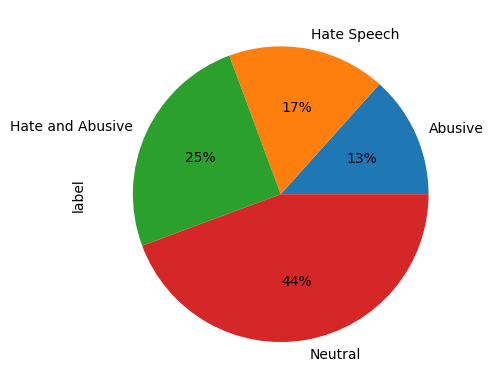

In [32]:
# Pie Chart
df.groupby('label').label.count().plot(kind='pie',  autopct='%1.0f%%')

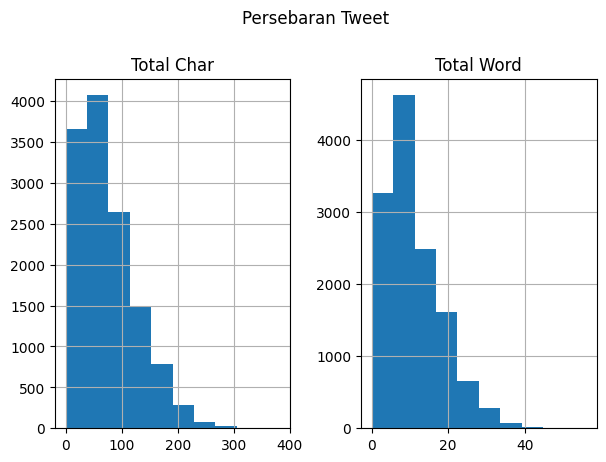

In [33]:
# Histogram Total Char and Total Word

fig, ax = plt.subplots(1,2)
fig.suptitle('Persebaran Tweet')
fig.tight_layout(pad= 2.0)

df.total_char.hist(ax = ax[0])
ax[0].set_title('Total Char')
df.total_word.hist(ax = ax[1])
ax[1].set_title('Total Word')

plt.show()

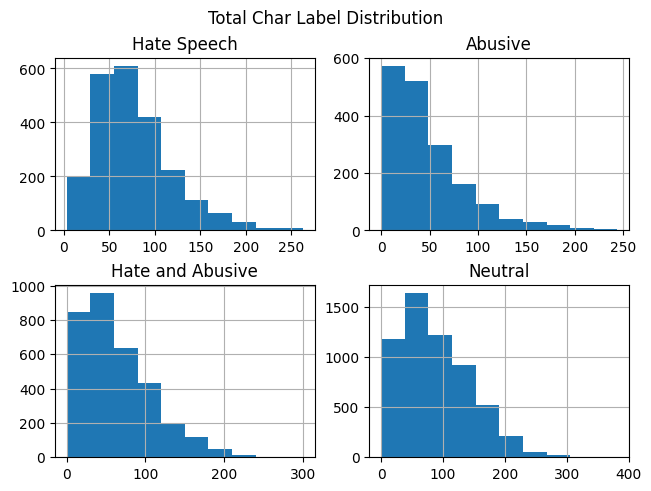

In [34]:
# Histogram Total Char Label
fig, ax = plt.subplots(2,2, constrained_layout = True)
fig.suptitle('Total Char Label Distribution')


df.loc[df['label'] == 'Hate Speech'].total_char.hist(ax = ax[0,0])
ax[0,0].set_title('Hate Speech')

df.loc[df['label'] == 'Abusive'].total_char.hist(ax = ax[0,1])
ax[0,1].set_title('Abusive')

df.loc[df['label'] == 'Hate and Abusive'].total_char.hist(ax = ax[1,0])
ax[1,0].set_title('Hate and Abusive')

df.loc[df['label'] == 'Neutral'].total_char.hist(ax = ax[1,1])
ax[1,1].set_title('Neutral')

plt.show()

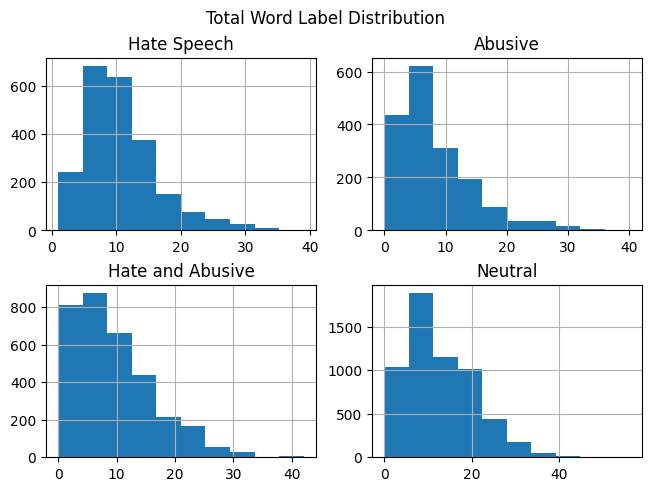

In [35]:
# Histogram Total Word Label
fig, ax = plt.subplots(2,2, constrained_layout = True)
fig.suptitle('Total Word Label Distribution')


df.loc[df['label'] == 'Hate Speech'].total_word.hist(ax = ax[0,0])
ax[0,0].set_title('Hate Speech')

df.loc[df['label'] == 'Abusive'].total_word.hist(ax = ax[0,1])
ax[0,1].set_title('Abusive')

df.loc[df['label'] == 'Hate and Abusive'].total_word.hist(ax = ax[1,0])
ax[1,0].set_title('Hate and Abusive')

df.loc[df['label'] == 'Neutral'].total_word.hist(ax = ax[1,1])
ax[1,1].set_title('Neutral')

plt.show()

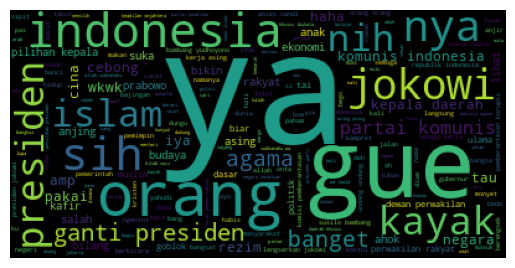

In [36]:
text = ' '.join(df['Tweet'])
wordCloud = WordCloud().generate(text)

plt.imshow(wordCloud)
plt.axis('off')
plt.show()

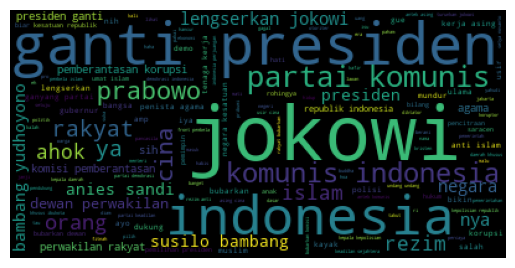

In [37]:
text = ' '.join(df.loc[df['label'] == 'Hate Speech'].Tweet)
wordCloud = WordCloud().generate(text)

plt.imshow(wordCloud)
plt.axis('off')
plt.show()

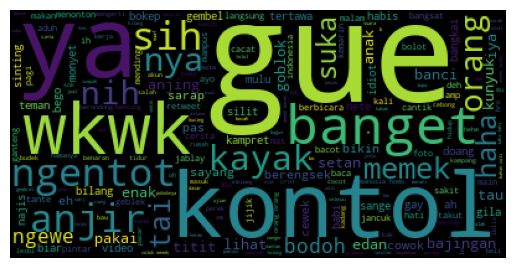

In [38]:
text = ' '.join(df.loc[df['label'] == 'Abusive'].Tweet)
wordCloud = WordCloud().generate(text)

plt.imshow(wordCloud)
plt.axis('off')
plt.show()

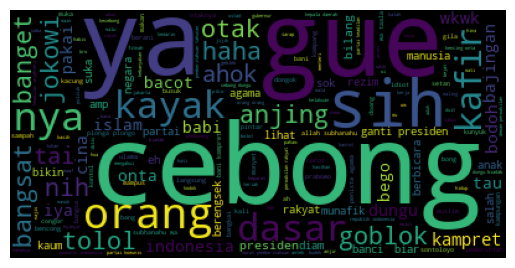

In [39]:
text = ' '.join(df.loc[df['label'] == 'Hate and Abusive'].Tweet)
wordCloud = WordCloud().generate(text)

plt.imshow(wordCloud)
plt.axis('off')
plt.show()

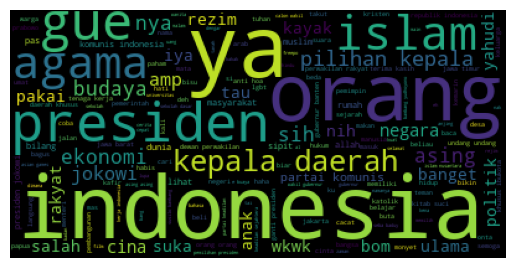

In [40]:
text = ' '.join(df.loc[df['label'] == 'Neutral'].Tweet)
wordCloud = WordCloud().generate(text)

plt.imshow(wordCloud)
plt.axis('off')
plt.show()

#### <u> Bivariate Analysis </u>

##### *Pearson Correlation* 

In [41]:
df[['total_char', 'total_word']].corr()

,total_char,total_word
total_char,1.000000,0.977018
total_word,0.977018,1.000000


##### *Visualization*

c:\Users\LEGION\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='total_word', ylabel='total_char'>

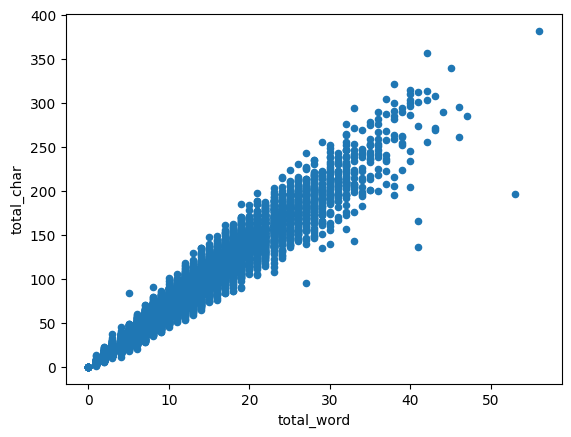

In [42]:
df.plot(x = 'total_word', y = 'total_char', kind = 'scatter')

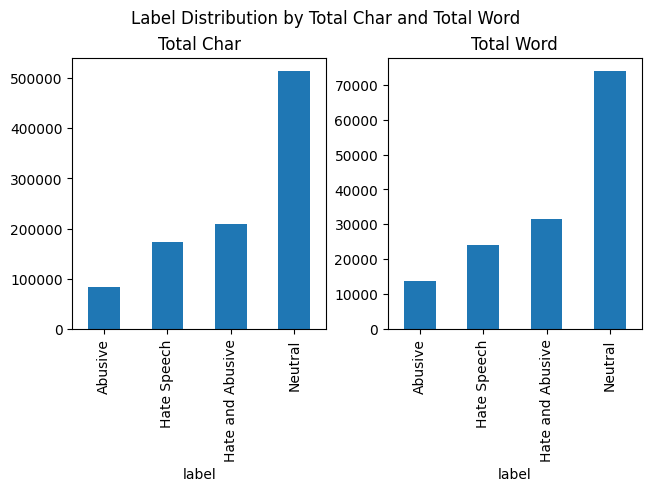

In [43]:
fig, ax = plt.subplots(1,2, constrained_layout = True)
fig.suptitle('Label Distribution by Total Char and Total Word')

df.groupby('label').total_char.sum().plot(kind = 'bar', ax = ax[0])
ax[0].set_title('Total Char')

df.groupby('label').total_word.sum().plot(kind = 'bar', ax = ax[1])
ax[1].set_title('Total Word')
plt.show()